In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn import preprocessing

In [2]:
telco_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')

In [3]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
print('Number of NAN values: {}'.format(telco_data.TotalCharges.isna().sum()))
telco_data.dropna(inplace=True) # Dropping NANs
del telco_data['customerID'] # Removing as no information content

Number of NAN values: 8


In [4]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


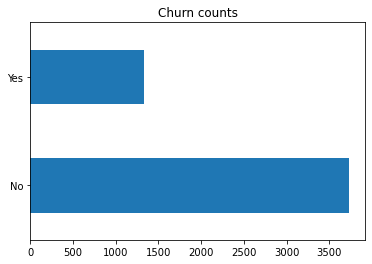

In [5]:
telco_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [6]:
telco_data.Churn = telco_data.Churn.replace({'Yes':True, 'No':False}) # Replacing 'Yes' and 'No' with numerical values

In [7]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


In [8]:
telco_data['Partner'] = telco_data.Partner.replace({'Yes':1, 'No':0}) 
telco_data['gender'] = telco_data.gender.replace({'Female':1, 'Male':0}) 

## Variable being predicted

In [9]:
variable_to_predict = 'Churn'

# Balancing dataset

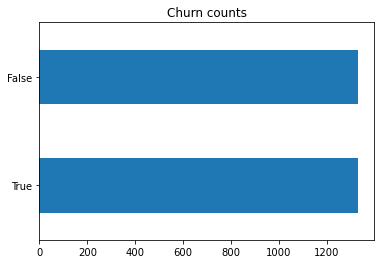

In [10]:
# balance examples in a month
positive_labels =  telco_data[telco_data[variable_to_predict]==True]
negative_labels =  telco_data[telco_data[variable_to_predict]==False]

num_pos_examples = positive_labels.shape[0]
num_neg_examples = negative_labels.shape[0]

if  num_pos_examples >= num_neg_examples:
    sampled_data =  negative_labels.append(positive_labels.sample(num_neg_examples))
else:
    sampled_data =  positive_labels.append(negative_labels.sample(num_pos_examples))
    
sampled_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [11]:
y = sampled_data.pop('Churn') # Removing Churn field and storing it in variable y

In [12]:
categorical_cols = sampled_data.columns[sampled_data.dtypes=='object'].tolist()
categorical_cols

['Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [13]:
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']

In [14]:
sampled_data_subset = sampled_data[['MonthlyCharges', 'tenure', 'InternetService', 'Contract', 'PaymentMethod' ]]

In [15]:
# Create dummy variables
data_for_model = pd.get_dummies(data = sampled_data_subset, columns=categorical_cols, drop_first=False)
data_for_model

,MonthlyCharges,tenure,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,53.85,2,1,0,0,1,0,0,0,0,0,1
4,70.70,2,0,1,0,1,0,0,0,0,1,0
5,99.65,8,0,1,0,1,0,0,0,0,1,0
8,104.80,28,0,1,0,1,0,0,0,0,1,0
13,103.70,49,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4763,91.55,58,0,1,0,1,0,0,0,0,1,0
1391,85.80,29,0,1,0,1,0,0,0,0,1,0
698,84.95,47,0,1,0,0,1,0,1,0,0,0
4483,25.60,67,0,0,1,0,0,1,0,1,0,0


# Splitting data

In [16]:
X = data_for_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [17]:
X_train.head()

,MonthlyCharges,tenure,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3817,20.25,53,0,0,1,0,0,1,0,0,0,1
4269,90.20,17,0,1,0,1,0,0,0,1,0,0
2717,92.65,72,1,0,0,0,0,1,1,0,0,0
2488,55.25,31,1,0,0,1,0,0,0,0,1,0
2721,79.25,10,0,1,0,1,0,0,0,0,1,0


# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3)

print(dt_model)

dt_model = dt_model.fit(X_train,y_train)
pred_dt = dt_model.predict_proba(X_valid)[:, 1]

DecisionTreeClassifier(max_depth=3)


In [19]:
!pip install pydotplus

Looking in indexes: http://artifacts.cloud.bamfunds.net/repository/python/simple


In [20]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file='tree.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist(), 
               class_names=['Not churn', 'Churn'])

Vizualize the output using <a href="https://dreampuf.github.io/GraphvizOnline/#digraph%20Tree%20%7B%0D%0Anode%20%5Bshape%3Dbox%2C%20style%3D%22filled%2C%20rounded%22%2C%20color%3D%22black%22%2C%20fontname%3Dhelvetica%5D%20%3B%0D%0Aedge%20%5Bfontname%3Dhelvetica%5D%20%3B%0D%0A0%20%5Blabel%3D%3CContract_Month-to-month%20%26le%3B%200.5%3Cbr%2F%3Egini%20%3D%200.393%3Cbr%2F%3Esamples%20%3D%202847%3Cbr%2F%3Evalue%20%3D%20%5B2083%2C%20764%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23efaf82%22%5D%20%3B%0D%0A1%20%5Blabel%3D%3CContract_Two%20year%20%26le%3B%200.5%3Cbr%2F%3Egini%20%3D%200.113%3Cbr%2F%3Esamples%20%3D%201249%3Cbr%2F%3Evalue%20%3D%20%5B1174%2C%2075%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23e78946%22%5D%20%3B%0D%0A0%20-%3E%201%20%5Blabeldistance%3D2.5%2C%20labelangle%3D45%2C%20headlabel%3D%22True%22%5D%20%3B%0D%0A2%20%5Blabel%3D%3CMonthlyCharges%20%26le%3B%2069.975%3Cbr%2F%3Egini%20%3D%200.189%3Cbr%2F%3Esamples%20%3D%20559%3Cbr%2F%3Evalue%20%3D%20%5B500%2C%2059%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23e89050%22%5D%20%3B%0D%0A1%20-%3E%202%20%3B%0D%0A3%20%5Blabel%3D%3Cgini%20%3D%200.079%3Cbr%2F%3Esamples%20%3D%20291%3Cbr%2F%3Evalue%20%3D%20%5B279%2C%2012%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23e68642%22%5D%20%3B%0D%0A2%20-%3E%203%20%3B%0D%0A4%20%5Blabel%3D%3Cgini%20%3D%200.289%3Cbr%2F%3Esamples%20%3D%20268%3Cbr%2F%3Evalue%20%3D%20%5B221%2C%2047%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23eb9c63%22%5D%20%3B%0D%0A2%20-%3E%204%20%3B%0D%0A5%20%5Blabel%3D%3CMonthlyCharges%20%26le%3B%2074.675%3Cbr%2F%3Egini%20%3D%200.045%3Cbr%2F%3Esamples%20%3D%20690%3Cbr%2F%3Evalue%20%3D%20%5B674%2C%2016%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23e6843e%22%5D%20%3B%0D%0A1%20-%3E%205%20%3B%0D%0A6%20%5Blabel%3D%3Cgini%20%3D%200.02%3Cbr%2F%3Esamples%20%3D%20388%3Cbr%2F%3Evalue%20%3D%20%5B384%2C%204%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23e5823b%22%5D%20%3B%0D%0A5%20-%3E%206%20%3B%0D%0A7%20%5Blabel%3D%3Cgini%20%3D%200.076%3Cbr%2F%3Esamples%20%3D%20302%3Cbr%2F%3Evalue%20%3D%20%5B290%2C%2012%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23e68641%22%5D%20%3B%0D%0A5%20-%3E%207%20%3B%0D%0A8%20%5Blabel%3D%3CInternetService_Fiber%20optic%20%26le%3B%200.5%3Cbr%2F%3Egini%20%3D%200.491%3Cbr%2F%3Esamples%20%3D%201598%3Cbr%2F%3Evalue%20%3D%20%5B909%2C%20689%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23f9e1cf%22%5D%20%3B%0D%0A0%20-%3E%208%20%5Blabeldistance%3D2.5%2C%20labelangle%3D-45%2C%20headlabel%3D%22False%22%5D%20%3B%0D%0A9%20%5Blabel%3D%3Ctenure%20%26le%3B%205.5%3Cbr%2F%3Egini%20%3D%200.407%3Cbr%2F%3Esamples%20%3D%20700%3Cbr%2F%3Evalue%20%3D%20%5B501%2C%20199%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23efb388%22%5D%20%3B%0D%0A8%20-%3E%209%20%3B%0D%0A10%20%5Blabel%3D%3Cgini%20%3D%200.491%3Cbr%2F%3Esamples%20%3D%20305%3Cbr%2F%3Evalue%20%3D%20%5B173%2C%20132%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23f9e1d0%22%5D%20%3B%0D%0A9%20-%3E%2010%20%3B%0D%0A11%20%5Blabel%3D%3Cgini%20%3D%200.282%3Cbr%2F%3Esamples%20%3D%20395%3Cbr%2F%3Evalue%20%3D%20%5B328%2C%2067%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23ea9b61%22%5D%20%3B%0D%0A9%20-%3E%2011%20%3B%0D%0A12%20%5Blabel%3D%3Ctenure%20%26le%3B%2039.5%3Cbr%2F%3Egini%20%3D%200.496%3Cbr%2F%3Esamples%20%3D%20898%3Cbr%2F%3Evalue%20%3D%20%5B408%2C%20490%5D%3Cbr%2F%3Eclass%20%3D%20Churn%3E%2C%20fillcolor%3D%22%23deeffb%22%5D%20%3B%0D%0A8%20-%3E%2012%20%3B%0D%0A13%20%5Blabel%3D%3Cgini%20%3D%200.477%3Cbr%2F%3Esamples%20%3D%20725%3Cbr%2F%3Evalue%20%3D%20%5B285%2C%20440%5D%3Cbr%2F%3Eclass%20%3D%20Churn%3E%2C%20fillcolor%3D%22%23b9dcf6%22%5D%20%3B%0D%0A12%20-%3E%2013%20%3B%0D%0A14%20%5Blabel%3D%3Cgini%20%3D%200.411%3Cbr%2F%3Esamples%20%3D%20173%3Cbr%2F%3Evalue%20%3D%20%5B123%2C%2050%5D%3Cbr%2F%3Eclass%20%3D%20Not%20churn%3E%2C%20fillcolor%3D%22%23f0b489%22%5D%20%3B%0D%0A12%20-%3E%2014%20%3B%0D%0A%7D" title="viz tool">this</a> tool.


The gini score is a metric that quantifies the purity of the node/leaf (more about leaves in a bit). A gini score greater than zero implies that samples contained within that node belong to different classes. A gini score of zero means that the node is pure, that within that node only a single class of samples exist. You can find out more about impurity measures here. Notice that we have a gini score greater than zero; therefore, we know that the samples contained within the root node belong to different classes.


In [21]:
from sklearn.metrics import classification_report
pred_dt_binary = dt_model.predict(X_valid)
print(classification_report(y_valid, pred_dt_binary))

              precision    recall  f1-score   support

       False       0.77      0.68      0.72       250
        True       0.71      0.80      0.75       250

    accuracy                           0.74       500
   macro avg       0.74      0.74      0.74       500
weighted avg       0.74      0.74      0.74       500



Precision tells us how many churned users our classifier predicted correctly. On the other side, recall tell us how many churned users it missed. 

# Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()  

print(rf_model)

rf_model.fit(X_train, y_train)  
pred_rf = rf_model.predict_proba(X_valid)[:,1]

RandomForestClassifier()


In [23]:
print(classification_report(y_valid, pred_rf.round(0)))

              precision    recall  f1-score   support

       False       0.73      0.66      0.69       250
        True       0.69      0.75      0.72       250

    accuracy                           0.70       500
   macro avg       0.71      0.70      0.70       500
weighted avg       0.71      0.70      0.70       500



n_estimators: This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.



# XGBoost

In [24]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

print(xgb_model)

xgb_model.fit(X_train, y_train)
pred_xgb =  xgb_model.predict_proba(X_valid)[:, 1]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)


In [25]:
print(classification_report(y_valid, pred_xgb.round()))

              precision    recall  f1-score   support

       False       0.73      0.68      0.70       250
        True       0.70      0.74      0.72       250

    accuracy                           0.71       500
   macro avg       0.71      0.71      0.71       500
weighted avg       0.71      0.71      0.71       500



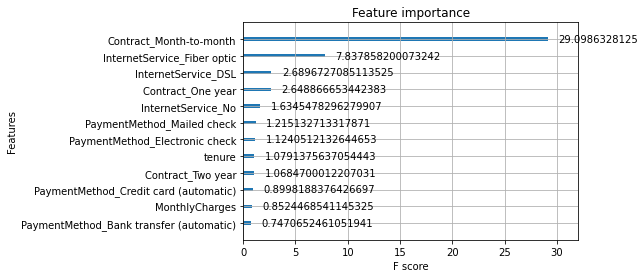

In [26]:
xgb.plot_importance(xgb_model, importance_type="gain")
plt.show()

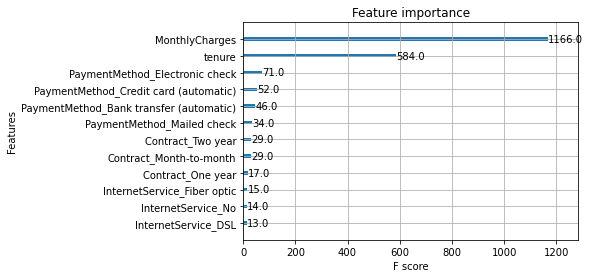

In [27]:
xgb.plot_importance(xgb_model, importance_type="weight")
plt.show()

# Evaluating model

In [28]:
def create_roc_plot(name, predictions):
  auc = roc_auc_score(y_valid, predictions).round(2)
  fpr, tpr, _ = roc_curve(y_valid, predictions)

  plt.figure(figsize=(5, 3))
  plt.plot([0, 1], [0, 1], linestyle='--')  # plot horizontal line 
  plt.plot(fpr, tpr, label='{} AUC = {}'.format(name, auc)) # plot the roc curve for the model
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(loc='lower right')  # show the legend
  plt.show() # show the plot
  return None

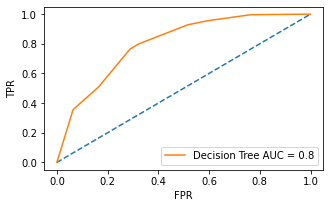

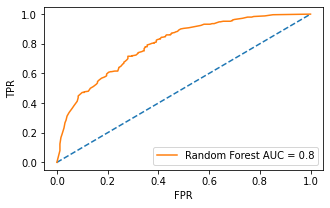

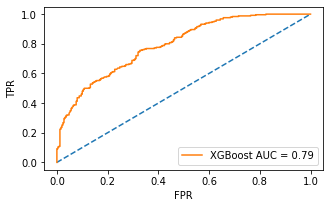

In [29]:
create_roc_plot('Decision Tree', pred_dt)
create_roc_plot('Random Forest', pred_rf)
create_roc_plot('XGBoost', pred_xgb)

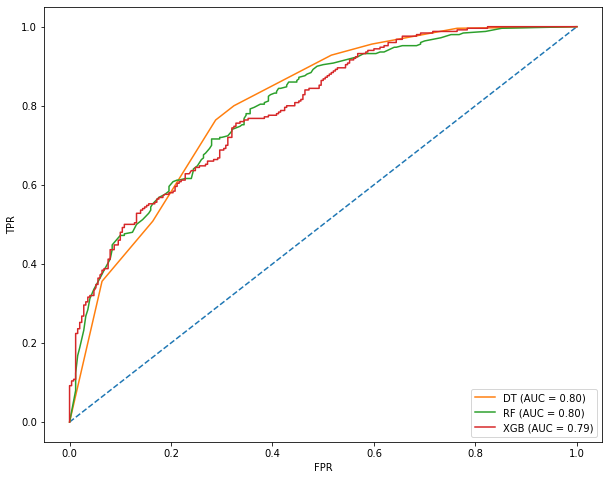

In [30]:
# calculate scores
auc_dt = roc_auc_score(y_valid, pred_dt)
auc_rf = roc_auc_score(y_valid, pred_rf)
auc_xgb = roc_auc_score(y_valid, pred_xgb)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_valid, pred_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_valid, pred_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_valid, pred_xgb)

plt.figure(figsize=(10, 8))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_rf, tpr_rf, label='RF (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (AUC = %0.2f)' % auc_xgb)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

## Shap model explainablity

In [31]:
!pip install shap

Looking in indexes: http://artifacts.cloud.bamfunds.net/repository/python/simple


In [32]:
import shap
shap.initjs() 

### Examining individual predictions

In [33]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [34]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

This plot give us the explainability of a single model prediction. Force plot can be used for error analysis, finding the explanation to specific instance prediction.

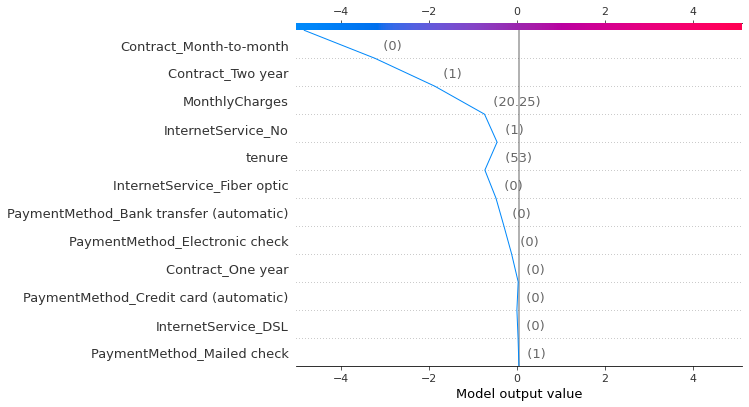

In [35]:
shap.decision_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

The Decision Plot shows essentially the same information as the Force Plot. The grey vertical line is the base value and the red line indicates if each feature moved the output value to a higher or lower value than the average prediction. This plot can be a little bit more clear and intuitive than the previous one, especially when there are many features to analyze.



In [36]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

This is a global representation of the previous predictions, we can use a variant of the force plot. Here we can see the predictions for a group of rows placed vertically (rotated of 90°) and side by side. 

### Model importance

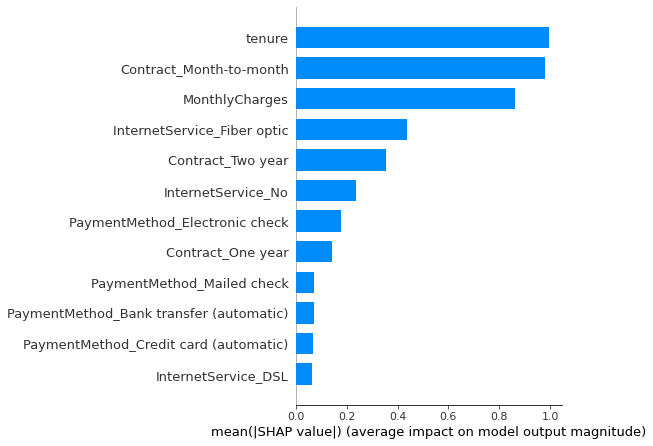

In [37]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

Feature importance calculated by SHAP values (features with large absolute Shapley values are important)

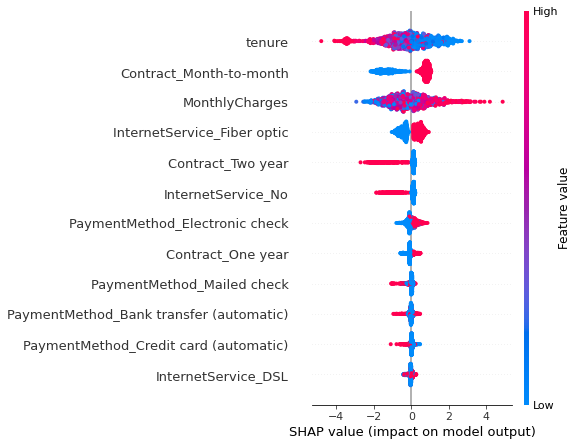

In [38]:
shap.summary_plot(shap_values, X_train, max_display=20)

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value of an instance per feature. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value of each instance.

The color represents the value of the feature from low to high. Overlapping points are jittered in the y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance